<h1> H팀


* 팀장: 2012140/정유진
* 팀원1: 1912168/이호림
* 팀원2: 2012191/변수현
* 팀원3: 2014384/허지윤



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[메모]
In_9_Size
9mm 사이즈인데
0인 데이터가 있으면 hole을 찾지 못한 것. => 결측치여서 빼내야 함

decisionP는 1이면 pass, 0이면 non pass

소수 이하 3째자리까지만 사용함!
결측치 없음


# 전처리한 데이터 불러오고 확인하기

In [ ]:
# Jupyter Notebook이나 ipython을 사용하다보면 향후 버전이 올라갈 때 변경될 사항 등을 알려주는
# 경고 메세지(warning message)를 무시할 때 사용한다
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
# one-hot-encoding과 min-max 스케일링이 적용된 데이터를 사용한다.
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/F_Rotor.csv", encoding="utf-8")

In [ ]:
data.head() # csv를 읽어오면 첫번째 칼럼이 인덱스 칼럼으로 쫙 정해진게 추가됨!! 주의!!!!!!!!
# 맨 왼쪽의 인덱스는 dataframe의 인덱스이고 그 뒤의 인덱스는 csv를 읽어오면서 추가된 인덱스들
# 이 상태로 그대로 진행하면 저 인덱스 값도 머신러닝에 적용되어 처리되어버림

,Unnamed: 0,In_22_Size,In_22_X,In_22_Y,In_22_XP,In_22_YP,In_8_Size,In_8_X,In_8_Y,In_8_XP,...,In_9_X,In_9_Y,In_9_XP,In_9_YP,In_9_P,In_9_PX,In_9_PY,In_9_PXB,In_9_PYB,decisionP
0,0,0.263751,1.421085e-14,7.105427e-15,-9.094947e-13,4.547474e-13,0.435124,-0.029918,-0.917867,0.001861,...,0.566484,-0.510586,0.553544,-0.520876,-0.460545,0.537013,-0.569903,0.526024,-0.547453,1
1,1,0.160330,1.421085e-14,7.105427e-15,-9.094947e-13,4.547474e-13,0.641711,0.298653,0.539664,0.327213,...,0.166597,-0.565576,0.197806,-0.549413,-0.714866,0.537013,-0.161741,0.546133,-0.183293,1
2,2,0.056909,1.421085e-14,7.105427e-15,-9.094947e-13,4.547474e-13,-0.184636,0.627224,-0.116225,0.658409,...,-0.366586,-0.070669,-0.341730,-0.082212,-1.187176,0.048843,0.382474,0.073962,0.351347,1
3,3,0.108620,1.421085e-14,7.105427e-15,-9.094947e-13,4.547474e-13,-2.043918,0.824367,-0.626361,0.827903,...,0.499837,1.688998,0.503148,1.664291,1.029047,-1.632632,-0.569903,-1.630521,-0.568637,0
4,4,0.160330,1.421085e-14,7.105427e-15,-9.094947e-13,4.547474e-13,-0.597810,-0.949917,1.414182,-0.949841,...,-0.299938,1.194092,-0.283428,1.170182,0.302417,-1.144462,0.246420,-1.159958,0.250471,1


In [ ]:
# round(값, 3)
# data.round(3)
data = round(data, 3)

In [ ]:
data.head()

,Unnamed: 0,In_22_Size,In_22_X,In_22_Y,In_22_XP,In_22_YP,In_8_Size,In_8_X,In_8_Y,In_8_XP,...,In_9_X,In_9_Y,In_9_XP,In_9_YP,In_9_P,In_9_PX,In_9_PY,In_9_PXB,In_9_PYB,decisionP
0,0,0.264,0.0,0.0,-0.0,0.0,0.435,-0.030,-0.918,0.002,...,0.566,-0.511,0.554,-0.521,-0.461,0.537,-0.570,0.526,-0.547,1
1,1,0.160,0.0,0.0,-0.0,0.0,0.642,0.299,0.540,0.327,...,0.167,-0.566,0.198,-0.549,-0.715,0.537,-0.162,0.546,-0.183,1
2,2,0.057,0.0,0.0,-0.0,0.0,-0.185,0.627,-0.116,0.658,...,-0.367,-0.071,-0.342,-0.082,-1.187,0.049,0.382,0.074,0.351,1
3,3,0.109,0.0,0.0,-0.0,0.0,-2.044,0.824,-0.626,0.828,...,0.500,1.689,0.503,1.664,1.029,-1.633,-0.570,-1.631,-0.569,0
4,4,0.160,0.0,0.0,-0.0,0.0,-0.598,-0.950,1.414,-0.950,...,-0.300,1.194,-0.283,1.170,0.302,-1.144,0.246,-1.160,0.250,1


In [ ]:
X = data.loc[:, "In_22_Size": "In_9_PYB"]
y = data[["decisionP"]]

In [ ]:
X.head()

,In_22_Size,In_22_X,In_22_Y,In_22_XP,In_22_YP,In_8_Size,In_8_X,In_8_Y,In_8_XP,In_8_YP,...,In_9_Size,In_9_X,In_9_Y,In_9_XP,In_9_YP,In_9_P,In_9_PX,In_9_PY,In_9_PXB,In_9_PYB
0,0.264,0.0,0.0,-0.0,0.0,0.435,-0.030,-0.918,0.002,-0.926,...,-0.584,0.566,-0.511,0.554,-0.521,-0.461,0.537,-0.570,0.526,-0.547
1,0.160,0.0,0.0,-0.0,0.0,0.642,0.299,0.540,0.327,0.572,...,-0.752,0.167,-0.566,0.198,-0.549,-0.715,0.537,-0.162,0.546,-0.183
2,0.057,0.0,0.0,-0.0,0.0,-0.185,0.627,-0.116,0.658,-0.118,...,0.256,-0.367,-0.071,-0.342,-0.082,-1.187,0.049,0.382,0.074,0.351
3,0.109,0.0,0.0,-0.0,0.0,-2.044,0.824,-0.626,0.828,-0.598,...,0.929,0.500,1.689,0.503,1.664,1.029,-1.633,-0.570,-1.631,-0.569
4,0.160,0.0,0.0,-0.0,0.0,-0.598,-0.950,1.414,-0.950,1.379,...,-0.416,-0.300,1.194,-0.283,1.170,0.302,-1.144,0.246,-1.160,0.250


In [ ]:
y.head()

,decisionP
0,1
1,1
2,1
3,0
4,1


In [ ]:
print(X.shape, y.shape)

(2974, 45) (2974, 1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf23bd9b10>,
      dtype=object)

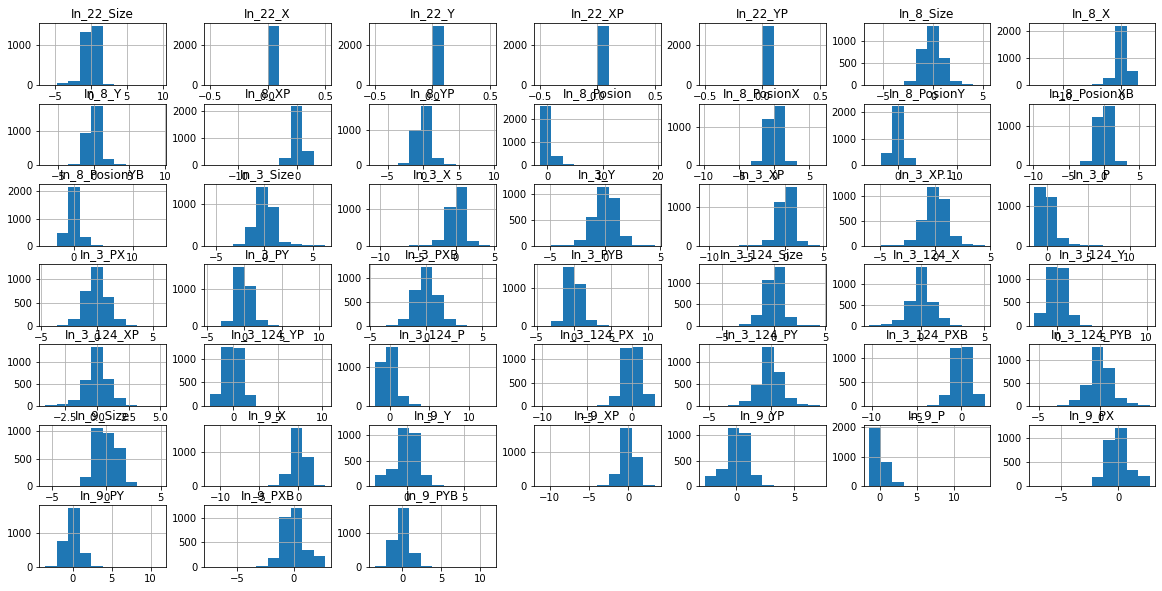

In [ ]:
# 연속형 데이터의 상태를 확인하기 위해 그래프를 출력해보고자 한다
# 그래프를 출력하기 위해서는 다음의 라이브러리를 선언해준다
import matplotlib.pyplot as plt

# X의 연속형 데이터를 그래프로 출력
pd.DataFrame(X).hist(figsize=(20,10))

<h3> 시각화 결과 전처리는 standardization을 한 것을 확인할 수 있었다

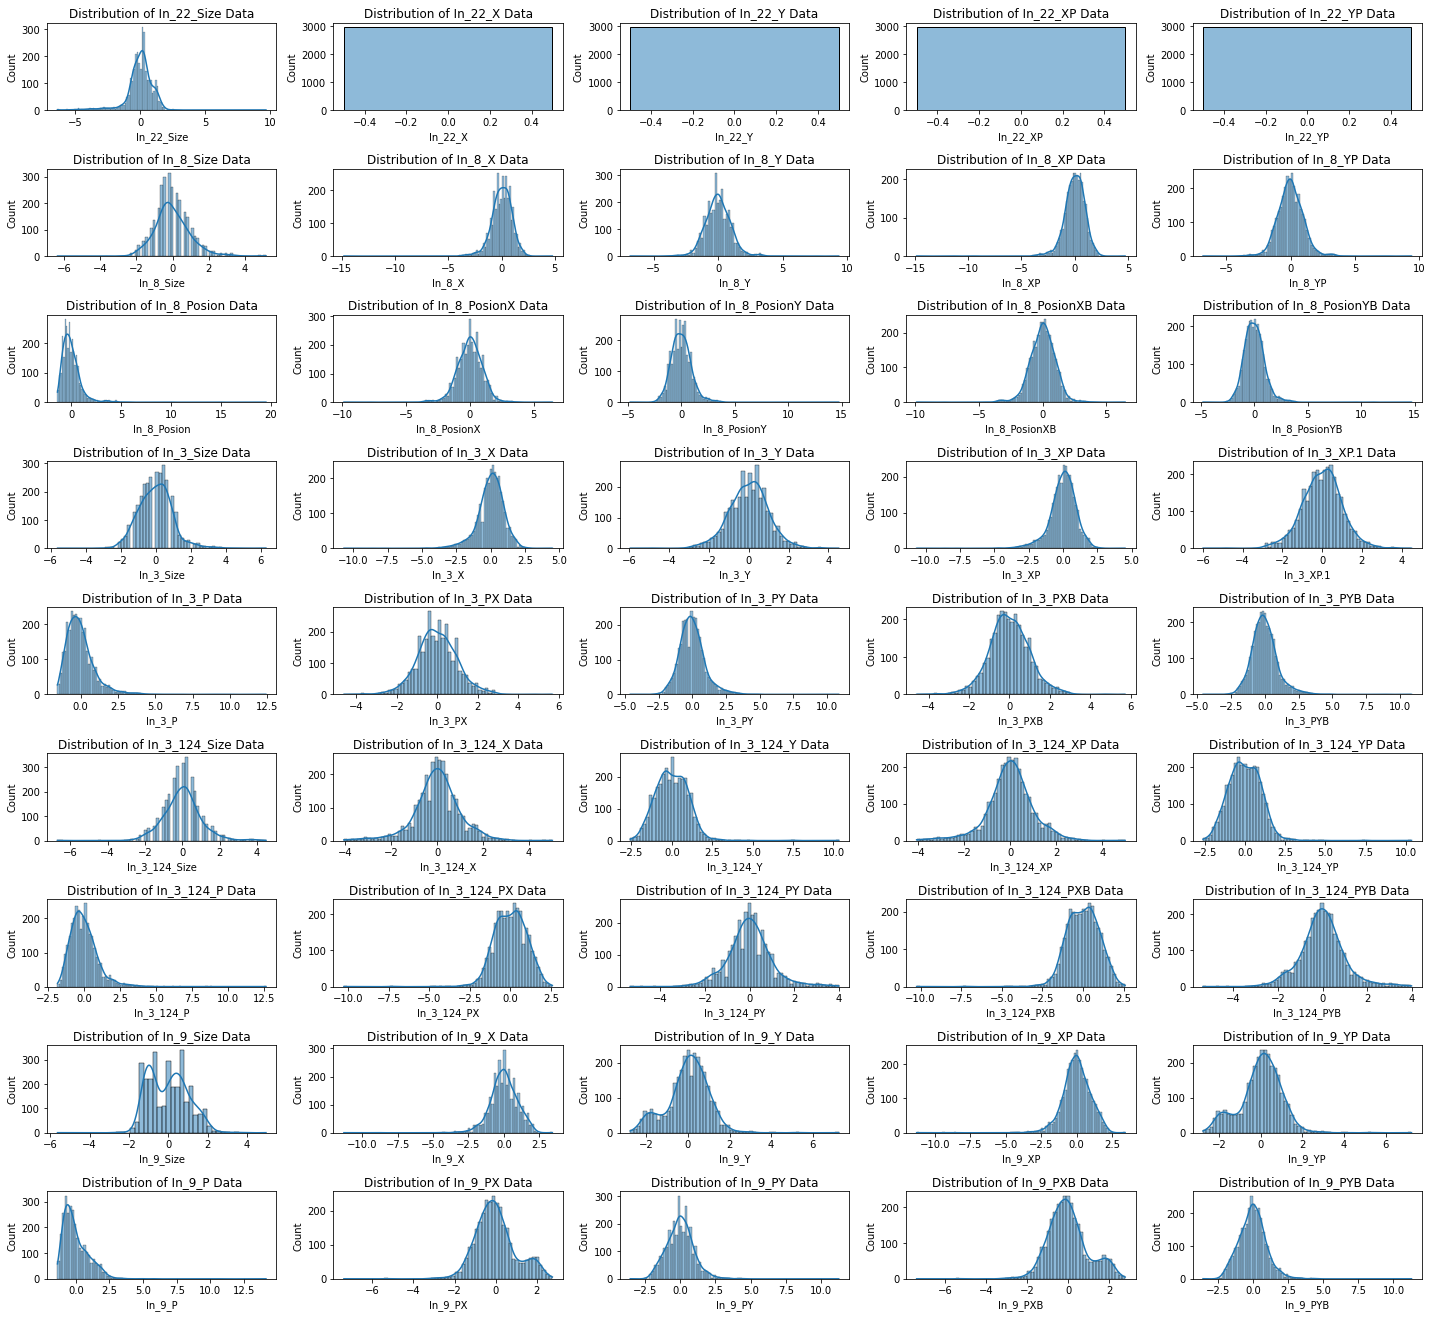

In [ ]:
import seaborn as sns
df = pd.DataFrame(X)
plt.figure(figsize=(20,20))
for i,col in enumerate(df.columns,1):
  plt.subplot(10,5,i)
  plt.title(f"Distribution of {col} Data")
  sns.histplot(df[col],kde=True)
  plt.tight_layout()
  plt.plot()

# train, test 데이터셋 나누기

In [ ]:
# 데이터셋을 나누기 위한 라이브러리를 선언한다
from sklearn.model_selection import train_test_split

In [ ]:
# 위 단계에서 분리한 feature X와 Label y에 대해, Train과 Test 셋으로 분리한다
# Train 셋은 X_train, y_train으로 정의되고, Test 셋은 X_test와 y_test로 정의된다.
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42, test_size=0.25)


In [ ]:
# test_size의 default값은 0.25
# 보통 train을 70%로 잡으니까 test를 30으로 해주고 싶으면 0.3을 써줘야 함

# y를 이용해서 한쪽에 쏠리지 않게 골고루 train, test set 분배해달라 = stratify
# 다음에 이 문장 반복해도 랜덤으로 가져오는 동작이 동일하게 해달라 = random_state =임의의 번호

# 가로로 자르는 것# 섞으면서도 일정 비율 유지해달라 => statify
# 데이터 양이 많을 경우 정규분포 형태로 수렴하게 됨
# 그러나 우리처럼 일부를 가져오면 한쪽에 몰릴 수 있어서 골고루 퍼지게 설정

# 보통 전처리보다 다시 여기로 와서 재수행하는 경우 많음
# randomstate 그전에 돌린 트레이닝, 테스트 셋 상태가 같아야 이것저것 시도해볼 수 있음 ★
# 번호는 아무거나 적어도 됨

# feature, label, 
# y1은 vote임 했는지 안 했는지 여부 1/0 그래서 train, test set 나눌 때 1의 비율도 적당히 잘 나눠줘야 함. 그때 쓰는게 stratify 옵션.
# 섞으면서도 일정 비율 유지해달라 => statify
# random_state=30으로 주고 나중에 30 주고 돌리면 30으로 두고 돌렸던 것과 같은 결과 나옴

In [ ]:
# 각각의 사이즈를 확인한다. 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#(train, feature) (test, feature) (train, label) (test, label)

(2230, 45) (744, 45) (2230, 1) (744, 1)


In [ ]:
X_train.head(2)

,In_22_Size,In_22_X,In_22_Y,In_22_XP,In_22_YP,In_8_Size,In_8_X,In_8_Y,In_8_XP,In_8_YP,...,In_9_Size,In_9_X,In_9_Y,In_9_XP,In_9_YP,In_9_P,In_9_PX,In_9_PY,In_9_PXB,In_9_PYB
998,-0.460,0.0,0.0,-0.0,0.0,2.088,-0.030,-1.501,-0.062,-1.493,...,-0.921,0.766,-1.115,0.781,-1.128,0.266,1.134,-0.774,1.129,-0.759
1947,-6.252,0.0,0.0,-0.0,0.0,0.642,-1.738,2.507,-1.749,2.510,...,-1.257,-1.966,1.799,-1.948,1.822,1.828,-1.850,1.947,-1.840,1.928


In [ ]:
X_test.head(2)

,In_22_Size,In_22_X,In_22_Y,In_22_XP,In_22_YP,In_8_Size,In_8_X,In_8_Y,In_8_XP,In_8_YP,...,In_9_Size,In_9_X,In_9_Y,In_9_XP,In_9_YP,In_9_P,In_9_PX,In_9_PY,In_9_PXB,In_9_PYB
57,0.005,0.0,0.0,-0.0,0.0,-1.011,0.627,-0.189,0.595,-0.198,...,-0.584,-0.567,0.424,-0.564,0.40,-0.606,-0.385,0.587,-0.408,0.562
2238,0.574,0.0,0.0,-0.0,0.0,0.642,0.627,0.321,0.625,0.355,...,-2.602,0.900,0.864,0.885,0.86,0.302,-0.819,-0.910,-0.829,-0.931


# 3 모델 훈련과 세부튜닝
KNN모델을 적용하고 Grid/Random Search를 하여 최적의 k를 찾기

## Random Search로 경향성 파악

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import randint

In [ ]:
param_distribs = {'n_neighbors': randint(low=1, high=50)} 
#많은 구간 주는게 좋을지도 모르겠지만 시간 많이 걸릴 수 있으니 적당히
#이전 vote에서 200개 정도에 20 high로 설정했으니 지금은 더 많은 양이니 50정도로 우선 설정

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
random_search=RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_distribs, cv=5, return_train_score = True)
#knn모델을 가져옴. param_distribution~=param~ 원래 그 파라매터 위치 아닌데 넣어준거임 = 써서 

In [ ]:
random_search.fit(X_train, y_train) # 랜덤서치를 적용

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5f0164b310>},
                   return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_)) # 가장 좋은 파라매터

Best Parameter: {'n_neighbors': 8}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_)) 
# n_neighbors가 위에서 나온 파라매터일 때 아래 %로 좋았다. random_search라는 모델.
# training 점수

Best Cross-validity Score: 0.829


In [ ]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))
# test 점수

Test set Score: 0.836


In [ ]:
result_random = pd.DataFrame(random_search.cv_results_) # 리스트 형태라 데이터프레임으로 바꿔줌

In [ ]:
result_random

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004202,0.000477,0.045156,0.002001,40,{'n_neighbors': 40},0.827354,0.802691,0.813901,0.813901,...,0.811211,0.010167,8,0.804933,0.820067,0.812780,0.812220,0.814462,0.812892,0.004853
1,0.004624,0.001116,0.044641,0.007054,7,{'n_neighbors': 7},0.836323,0.820628,0.820628,0.831839,...,0.825561,0.007147,3,0.849215,0.853700,0.845852,0.846413,0.848655,0.848767,0.002778
2,0.004503,0.000866,0.043300,0.000821,28,{'n_neighbors': 28},0.827354,0.804933,0.813901,0.816143,...,0.812556,0.009364,6,0.812780,0.826794,0.818386,0.815022,0.816704,0.817937,0.004801
3,0.008209,0.008360,0.062418,0.042380,6,{'n_neighbors': 6},0.838565,0.820628,0.818386,0.838565,...,0.827803,0.008901,2,0.879484,0.873879,0.878363,0.874439,0.880605,0.877354,0.002709
4,0.003976,0.000086,0.044448,0.004399,17,{'n_neighbors': 17},0.827354,0.804933,0.811659,0.820628,...,0.814798,0.008097,4,0.818386,0.831278,0.816143,0.817825,0.822870,0.821300,0.005462
5,0.004212,0.000307,0.043186,0.001125,32,{'n_neighbors': 32},0.831839,0.804933,0.818386,0.818386,...,0.814350,0.011728,5,0.809417,0.822309,0.816143,0.813901,0.817265,0.815807,0.004219
6,0.003903,0.000057,0.053182,0.016045,39,{'n_neighbors': 39},0.825112,0.802691,0.811659,0.811659,...,0.808520,0.011130,9,0.803812,0.820067,0.812220,0.810538,0.810538,0.811435,0.005193
7,0.004281,0.000632,0.042789,0.000616,33,{'n_neighbors': 33},0.827354,0.802691,0.818386,0.816143,...,0.811659,0.011949,7,0.806614,0.821188,0.813901,0.810538,0.814462,0.813341,0.004822
8,0.003989,0.000110,0.047619,0.006916,37,{'n_neighbors': 37},0.825112,0.800448,0.811659,0.813901,...,0.808520,0.011573,9,0.804933,0.820067,0.809978,0.811659,0.812780,0.811883,0.004894
9,0.004000,0.000092,0.041538,0.000393,8,{'n_neighbors': 8},0.827354,0.825112,0.831839,0.838565,...,0.828700,0.006116,1,0.860426,0.857063,0.853700,0.854821,0.858744,0.856951,0.002466


<h2> random search에서 n_neighbors를 기준으로 정렬하여 경향성을 파악

In [ ]:
df_sample = pd.DataFrame(result_random)
df_sample = df_sample.sort_values('param_n_neighbors') # param_n_neighbors 기준으로 정렬 

In [ ]:
df_sample.head(3) # param_n_neighbors 기준으로 정렬 확인

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
3,0.008209,0.008360,0.062418,0.042380,6,{'n_neighbors': 6},0.838565,0.820628,0.818386,0.838565,...,0.827803,0.008901,2,0.879484,0.873879,0.878363,0.874439,0.880605,0.877354,0.002709
1,0.004624,0.001116,0.044641,0.007054,7,{'n_neighbors': 7},0.836323,0.820628,0.820628,0.831839,...,0.825561,0.007147,3,0.849215,0.853700,0.845852,0.846413,0.848655,0.848767,0.002778
9,0.004000,0.000092,0.041538,0.000393,8,{'n_neighbors': 8},0.827354,0.825112,0.831839,0.838565,...,0.828700,0.006116,1,0.860426,0.857063,0.853700,0.854821,0.858744,0.856951,0.002466


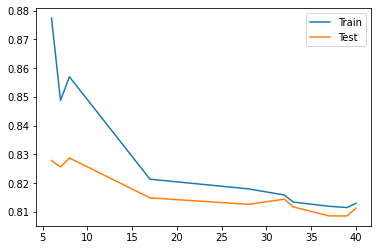

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_sample['param_n_neighbors'], df_sample['mean_train_score'], label="Train")
plt.plot(df_sample['param_n_neighbors'], df_sample['mean_test_score'], label="Test")
plt.legend()

test_size=0.2~0.5 일 때 
random search는 전부
15 이전에서 가장 높은 수치를 보이고 이후 계속 하락하는 형태

## Grid Search (랜덤서치의 경향성에 따라 범위 설정)

In [ ]:
#모델 훈련을 위해 GridSearchCV를 선언함
from sklearn.model_selection import GridSearchCV

In [ ]:
n = 15
param_list = []
for i in range(1, n+1):
  param_list.append(i)

param_grid={'n_neighbors': param_list}

In [ ]:
#KNN 알고리즘 적용을 위한 라이브러리 선언
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#KNN 알고리즘에 GridSearch를 적용함
#grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
#KNN 알고리즘에 GridSearch를 적용함
grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score = True) # train score 보려면 return_train_score = True라고 해줘야 함!!!! ★

In [ ]:
#Train 데이터에 GridSearch를 적용함
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             return_train_score=True)

In [ ]:
#가장 좋은 결과를 얻는 그리드 파라매터를 출력함
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'n_neighbors': 3}


In [ ]:
#grid_search의 최종 스코어를 출력함
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_)) # train


Best Cross-validity Score: 0.834


In [ ]:
#Test 데이터에 대해 grid_search 알고리즘을 적용함
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test))) # test

Test set Score: 0.852


In [ ]:
#grid_search.cv_results_ # 리스트 형식으로 나옴. 그리드 param에 따른 결과들

In [ ]:
result_grid= pd.DataFrame(grid_search.cv_results_)

In [ ]:
result_grid
# cv 5번 한 fit의 평균 시간

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004908,0.000716,0.029902,0.000466,1,{'n_neighbors': 1},0.791480,0.820628,0.809417,0.827354,...,0.810762,0.012492,14,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.004245,0.000674,0.034071,0.002485,2,{'n_neighbors': 2},0.760090,0.813901,0.762332,0.825112,...,0.789686,0.026355,15,0.943946,0.933296,0.942825,0.937220,0.938901,0.939238,0.003861
2,0.004062,0.000154,0.035762,0.002036,3,{'n_neighbors': 3},0.834081,0.834081,0.829596,0.836323,...,0.834081,0.002456,1,0.900785,0.911435,0.896300,0.899664,0.900785,0.901794,0.005093
3,0.004316,0.000566,0.045700,0.006120,4,{'n_neighbors': 4},0.836323,0.836323,0.820628,0.829596,...,0.830493,0.005778,2,0.906390,0.904709,0.906951,0.903587,0.904148,0.905157,0.001298
4,0.004013,0.000108,0.041692,0.001051,5,{'n_neighbors': 5},0.834081,0.813901,0.816143,0.838565,...,0.823318,0.010744,7,0.869955,0.872758,0.866031,0.867152,0.870516,0.869283,0.002415
5,0.003929,0.000011,0.042438,0.001725,6,{'n_neighbors': 6},0.838565,0.820628,0.818386,0.838565,...,0.827803,0.008901,4,0.879484,0.873879,0.878363,0.874439,0.880605,0.877354,0.002709
6,0.003983,0.000077,0.042498,0.000822,7,{'n_neighbors': 7},0.836323,0.820628,0.820628,0.831839,...,0.825561,0.007147,6,0.849215,0.853700,0.845852,0.846413,0.848655,0.848767,0.002778
7,0.005043,0.001358,0.053795,0.018475,8,{'n_neighbors': 8},0.827354,0.825112,0.831839,0.838565,...,0.828700,0.006116,3,0.860426,0.857063,0.853700,0.854821,0.858744,0.856951,0.002466
8,0.009515,0.003890,0.102230,0.040881,9,{'n_neighbors': 9},0.831839,0.811659,0.820628,0.829596,...,0.821525,0.008097,9,0.837444,0.838565,0.834081,0.834081,0.843610,0.837556,0.003517
9,0.017051,0.007298,0.145031,0.018590,10,{'n_neighbors': 10},0.834081,0.813901,0.834081,0.834081,...,0.826906,0.008901,5,0.844731,0.849215,0.842489,0.841368,0.852018,0.845964,0.004048


### 결과 저장 및 그래프 그리기

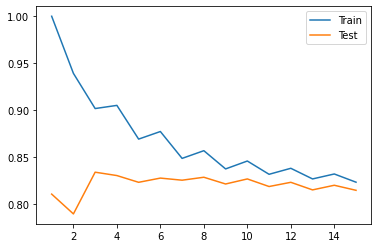

In [ ]:
#  return_train_score=True으로 해서 결과 뽑은 이유는 둘이 비교하려고!!!!!!
# true로 안해주면 mean_train_score이 없어서 그리지 못함 
# train에서 n_neighbors가 1일 때 1인 것은 자기 주변 knn에서 자기 자신만 하게 되어서 이다. 
# test가 제일 높으게 잘 나온거
import matplotlib.pyplot as plt
# x축, y축
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_test_score'], label="Test")
plt.legend() # 범례를 보여줌

# 4 모델 평가 - 이진분류

## 모델 적용

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
print(grid_search.best_params_)

{'n_neighbors': 3}


In [ ]:
type(grid_search.best_params_)

dict

In [ ]:
# 위에서 뽑은 것 가져오기
knn=KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors']) 

In [ ]:
knn.fit(X_train, y_train) # train 셋에 적용하기

KNeighborsClassifier(n_neighbors=3)

## 있는 것으로 예측 및 비교

In [ ]:
from sklearn.metrics import confusion_matrix
# Confusion matrix에서
# [정확도]Accuracy =(TN + TP) / Total
# [정밀도]Precision = TP / (TP + FP)
# [재현율]Recall = TP / (TP + FN)
# f-score = 2 / ((1 / precision) + (1 / recall))

In [ ]:
pred_train=knn.predict(X_train) # y_train 없이 X_train을 가지고 예측하는 것
# X_train만 가지고 y 예측 (y_train은 given label)

In [ ]:
#pred_train

In [ ]:
y_train.value_counts(sort=False) 
# 개수 확인 => 0은 적고 1이 많음 
#모델 학습에서 문제인듯. knn이 적합하지 않다고 판단 가능.

decisionP
0             595
1            1635
dtype: int64

In [ ]:
y_test.value_counts(sort=False) # 개수 확인

decisionP
0            198
1            546
dtype: int64

In [ ]:
confusion_train = confusion_matrix(y_train, pred_train) # 실제 y_train과 예측한 pred와 비교
# 이미 주어진 y_train과 예측한 것으로 오차행렬 만들

In [ ]:
pd.crosstab(y_train["decisionP"], pred_train) #원래 있던것, 예측한 것

col_0,0,1
decisionP,,
0,413,182
1,21,1614


In [ ]:
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[ 413  182]
 [  21 1614]]


In [ ]:
pred_test=knn.predict(X_test) # y_test 없이 X_test를 가지고 예측 # y_test : given label

In [ ]:
confusion_test=confusion_matrix(y_test, pred_test)

In [ ]:
pd.crosstab(y_test["decisionP"], pred_test) #원래 있던것, 예측한 것

col_0,0,1
decisionP,,
0,98,100
1,10,536


In [ ]:
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[ 98 100]
 [ 10 536]]


## f1 score 

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# 계산 공식
'''
TP=39 # True인데 Positive로 생각한 것
FP=8  # False인데 Positive로 생각한 것
FN=1  # False인데 Negative로 생각한 것
TN=5  # True인데 Negative로 생각한 것
#precision
precision=TP/(TP+FP)
precision
#recall
recall=TP/(TP+FN)
recall
f_score=2/((1/precision)+(1/recall))
f_score
'''

'\nTP=39 # True인데 Positive로 생각한 것\nFP=8  # False인데 Positive로 생각한 것\nFN=1  # False인데 Negative로 생각한 것\nTN=5  # True인데 Negative로 생각한 것\n#precision\nprecision=TP/(TP+FP)\nprecision\n#recall\nrecall=TP/(TP+FN)\nrecall\nf_score=2/((1/precision)+(1/recall))\nf_score\n'

In [ ]:
#f1=f1_score(y_test, pred_test)
f1=f1_score(y_test, pred_test, average="micro" ) # 이항분류일 경우에만 binary를 사용함

In [ ]:
print("f1 score:\n", f1)  # f1- score조화평균

f1 score:
 0.8521505376344086


In [ ]:
f2=f1_score(y_test, pred_test, average="macro" )

In [ ]:
print("macro f1 score:\n", f2)

macro f1 score:
 0.7737301350320162


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cfreport=classification_report(y_test, pred_test)
#classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False)[source]

In [ ]:
cfreport

'              precision    recall  f1-score   support\n\n           0       0.91      0.49      0.64       198\n           1       0.84      0.98      0.91       546\n\n    accuracy                           0.85       744\n   macro avg       0.88      0.74      0.77       744\nweighted avg       0.86      0.85      0.84       744\n'

In [ ]:
print("분류예측 레포트:\n", cfreport)
# support : the number of occurrences of each class in y_true
# micro average (averaging the total TP, FN and FP)
# macro average (averaging the unweighted mean per label)
# weighted average (averaging the support-weighted mean per label)

# accuracy만 잘 확인

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.91      0.49      0.64       198
           1       0.84      0.98      0.91       546

    accuracy                           0.85       744
   macro avg       0.88      0.74      0.77       744
weighted avg       0.86      0.85      0.84       744



# train/test set 나누기~ f1스코어 전 과정을 함수로 만들어 쉽게 비교

In [ ]:
# 데이터셋을 나누기 위한 라이브러리를 선언한다
from sklearn.model_selection import train_test_split
#모델 훈련을 위해 GridSearchCV를 선언함
from sklearn.model_selection import GridSearchCV
#KNN 알고리즘 적용을 위한 라이브러리 선언
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

<H3> 그리드 서치로만 진행. 위에서 랜덤 서치로 15이하에서 최대값 나온다는 경향성 파악 완료

In [ ]:
def doit(my_random_state, my_test_size, my_cv):
  X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=my_random_state, test_size=my_test_size)
  n = 15
  param_list = []
  for i in range(1, n+1):
    param_list.append(i)

  param_grid={'n_neighbors': param_list}
  grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=my_cv, return_train_score = True) # train score 보려면 return_train_score = True라고 해줘야 함!!!! ★
  #Train 데이터에 GridSearch를 적용함
  grid_search.fit(X_train, y_train)
  #가장 좋은 결과를 얻는 그리드 파라매터를 출력함
  print("Best Parameter: {}".format(grid_search.best_params_))
  #grid_search의 최종 스코어를 출력함
  print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_)) # train
  #Test 데이터에 대해 grid_search 알고리즘을 적용함
  print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test))) # test
  print(grid_search.best_params_)
  # 위에서 뽑은 것 가져오기
  knn=KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors']) 
  knn.fit(X_train, y_train) # train 셋에 적용하기
  pred_train=knn.predict(X_train) # y_train 없이 X_train을 가지고 예측하는 것
  # X_train만 가지고 y 예측 (y_train은 given label)
  #y_train.value_counts(sort=False) 
  #y_test.value_counts(sort=False) # 개수 확인
  #confusion_train = confusion_matrix(y_train, pred_train)
  pred_test=knn.predict(X_test) # y_test 없이 X_test를 가지고 예측 # y_test : given label
  #f1=f1_score(y_test, pred_test)
  f1=f1_score(y_test, pred_test, average="micro" ) # 이항분류일 경우에만 binary를 사용함
  print("f1 score:\n", f1)  # f1- score조화평균
  f2=f1_score(y_test, pred_test, average="macro" )
  print("macro f1 score:\n", f2)
  cfreport=classification_report(y_test, pred_test)
  print("분류예측 레포트:\n", cfreport)

In [ ]:
doit(42, 0.3, 5)

Best Parameter: {'n_neighbors': 6}
Best Cross-validity Score: 0.831
Test set Score: 0.839
{'n_neighbors': 6}
f1 score:
 0.8387458006718925
macro f1 score:
 0.7515648908053971
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.87      0.46      0.60       238
           1       0.83      0.98      0.90       655

    accuracy                           0.84       893
   macro avg       0.85      0.72      0.75       893
weighted avg       0.84      0.84      0.82       893



In [ ]:
doit(42, 0.25, 5)

Best Parameter: {'n_neighbors': 3}
Best Cross-validity Score: 0.834
Test set Score: 0.852
{'n_neighbors': 3}
f1 score:
 0.8521505376344086
macro f1 score:
 0.7737301350320162
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.91      0.49      0.64       198
           1       0.84      0.98      0.91       546

    accuracy                           0.85       744
   macro avg       0.88      0.74      0.77       744
weighted avg       0.86      0.85      0.84       744



In [ ]:
doit(42, 0.25, 10)

Best Parameter: {'n_neighbors': 4}
Best Cross-validity Score: 0.833
Test set Score: 0.836
{'n_neighbors': 4}
f1 score:
 0.8360215053763441
macro f1 score:
 0.7634968941509985
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.78      0.53      0.63       198
           1       0.85      0.95      0.89       546

    accuracy                           0.84       744
   macro avg       0.82      0.74      0.76       744
weighted avg       0.83      0.84      0.82       744



In [ ]:
doit(42, 0.25, 7)

Best Parameter: {'n_neighbors': 6}
Best Cross-validity Score: 0.832
Test set Score: 0.840
{'n_neighbors': 6}
f1 score:
 0.8400537634408601
macro f1 score:
 0.7534193925721686
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.88      0.46      0.61       198
           1       0.83      0.98      0.90       546

    accuracy                           0.84       744
   macro avg       0.86      0.72      0.75       744
weighted avg       0.85      0.84      0.82       744



In [ ]:
doit(42, 0.1, 5)

Best Parameter: {'n_neighbors': 8}
Best Cross-validity Score: 0.833
Test set Score: 0.832
{'n_neighbors': 8}
f1 score:
 0.8322147651006712
macro f1 score:
 0.7251328217237307
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.94      0.39      0.55        79
           1       0.82      0.99      0.90       219

    accuracy                           0.83       298
   macro avg       0.88      0.69      0.73       298
weighted avg       0.85      0.83      0.81       298



In [ ]:
doit(42, 0.2, 5)

Best Parameter: {'n_neighbors': 6}
Best Cross-validity Score: 0.835
Test set Score: 0.832
{'n_neighbors': 6}
f1 score:
 0.8319327731092437
macro f1 score:
 0.7322906918148442
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.90      0.42      0.57       159
           1       0.82      0.98      0.90       436

    accuracy                           0.83       595
   macro avg       0.86      0.70      0.73       595
weighted avg       0.84      0.83      0.81       595



In [ ]:
doit(42, 0.3, 5)

Best Parameter: {'n_neighbors': 6}
Best Cross-validity Score: 0.831
Test set Score: 0.839
{'n_neighbors': 6}
f1 score:
 0.8387458006718925
macro f1 score:
 0.7515648908053971
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.87      0.46      0.60       238
           1       0.83      0.98      0.90       655

    accuracy                           0.84       893
   macro avg       0.85      0.72      0.75       893
weighted avg       0.84      0.84      0.82       893



In [ ]:
doit(45, 0.3, 5)

Best Parameter: {'n_neighbors': 6}
Best Cross-validity Score: 0.838
Test set Score: 0.840
{'n_neighbors': 6}
f1 score:
 0.8398656215005599
macro f1 score:
 0.751763619575254
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.89      0.46      0.60       238
           1       0.83      0.98      0.90       655

    accuracy                           0.84       893
   macro avg       0.86      0.72      0.75       893
weighted avg       0.85      0.84      0.82       893



# 최종 결과 

In [ ]:
doit(42, 0.25, 5)

Best Parameter: {'n_neighbors': 3}
Best Cross-validity Score: 0.834
Test set Score: 0.852
{'n_neighbors': 3}
f1 score:
 0.8521505376344086
macro f1 score:
 0.7737301350320162
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.91      0.49      0.64       198
           1       0.84      0.98      0.91       546

    accuracy                           0.85       744
   macro avg       0.88      0.74      0.77       744
weighted avg       0.86      0.85      0.84       744



random_state = 42

test_size = 0.25

cv = 5

이렇게 두었을 때 가장 좋은 결과값 나옴
(함수 내부적으로 알아서 grid에서 best인 param 적용)

# 추가 실험: 유클리디안 거리와 멘허튼 거리일 때의 차이

In [ ]:
def doit(my_random_state, my_test_size, my_cv, my_metric):
  X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=my_random_state, test_size=my_test_size)
  n = 15
  param_list = []
  for i in range(1, n+1):
    param_list.append(i)

  param_grid={'n_neighbors': param_list}
  grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=my_cv, return_train_score = True) # train score 보려면 return_train_score = True라고 해줘야 함!!!! ★
  #Train 데이터에 GridSearch를 적용함
  grid_search.fit(X_train, y_train)
  #가장 좋은 결과를 얻는 그리드 파라매터를 출력함
  print("Best Parameter: {}".format(grid_search.best_params_))
  #grid_search의 최종 스코어를 출력함
  print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_)) # train
  #Test 데이터에 대해 grid_search 알고리즘을 적용함
  print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test))) # test
  print(grid_search.best_params_)
  # 위에서 뽑은 것 가져오기
  knn=KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], metric=my_metric) 
  knn.fit(X_train, y_train) # train 셋에 적용하기
  pred_train=knn.predict(X_train) # y_train 없이 X_train을 가지고 예측하는 것
  # X_train만 가지고 y 예측 (y_train은 given label)
  #y_train.value_counts(sort=False) 
  #y_test.value_counts(sort=False) # 개수 확인
  #confusion_train = confusion_matrix(y_train, pred_train)
  pred_test=knn.predict(X_test) # y_test 없이 X_test를 가지고 예측 # y_test : given label
  #f1=f1_score(y_test, pred_test)
  f1=f1_score(y_test, pred_test, average="micro" ) # 이항분류일 경우에만 binary를 사용함
  print("f1 score:\n", f1)  # f1- score조화평균
  f2=f1_score(y_test, pred_test, average="macro" )
  print("macro f1 score:\n", f2)
  cfreport=classification_report(y_test, pred_test)
  print("분류예측 레포트:\n", cfreport)

In [ ]:
doit(42, 0.25, 5, 'euclidean')

Best Parameter: {'n_neighbors': 3}
Best Cross-validity Score: 0.834
Test set Score: 0.852
{'n_neighbors': 3}
f1 score:
 0.8521505376344086
macro f1 score:
 0.7737301350320162
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.91      0.49      0.64       198
           1       0.84      0.98      0.91       546

    accuracy                           0.85       744
   macro avg       0.88      0.74      0.77       744
weighted avg       0.86      0.85      0.84       744



In [ ]:
doit(42, 0.25, 5, 'manhattan')

Best Parameter: {'n_neighbors': 3}
Best Cross-validity Score: 0.834
Test set Score: 0.852
{'n_neighbors': 3}
f1 score:
 0.8172043010752688
macro f1 score:
 0.7202481669486747
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.79      0.43      0.56       198
           1       0.82      0.96      0.88       546

    accuracy                           0.82       744
   macro avg       0.80      0.69      0.72       744
weighted avg       0.81      0.82      0.80       744



<h4> => 기본값이 유클리디안 거리로 KNN모델을 만드는 것이 더 성능이 좋았다